In [49]:
## Database Phase
import pandas as pd


# Machine Learning Phase
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading the dataset
bank=pd.read_csv("../first project/bank.csv",sep=';')
dup_data=bank.copy()


In [4]:
dup_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Calculate the statistics
dup_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#Checking the counts
features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for feature in features:
    print(feature.capitalize() + ":")
    print(dup_data[feature].value_counts(), sep='\n')
    print("-" * 40)


Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing:
yes        21576
no         18622
unknown      990
N

In [7]:
#Checking the percentage of missing values
missing_percentage = (dup_data.isnull().sum() / len(dup_data)) * 100
print(missing_percentage)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


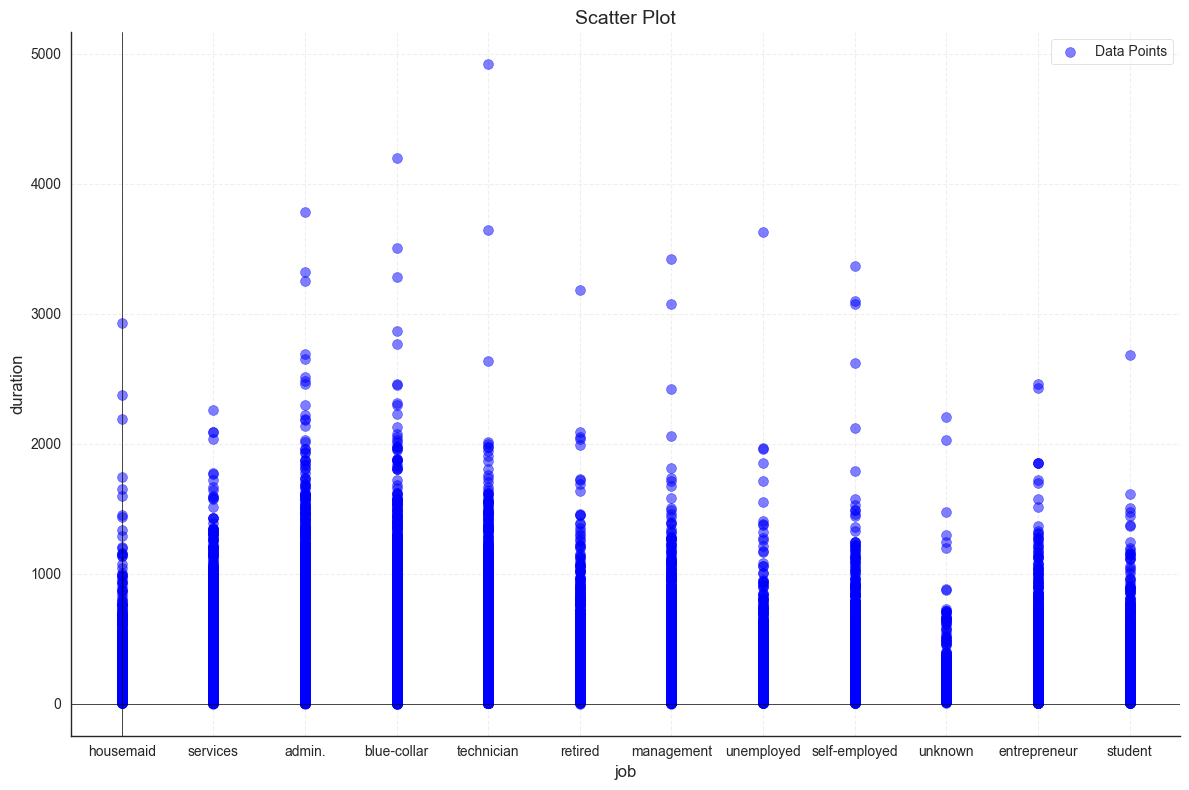

In [8]:
#Visualizing the duration of the calls in every profession
x_column = 'job'
y_column = 'duration'

# Create a figure and axes
fig, ax = plt.subplots()

# Create a scatter plot with customizations
ax.scatter(dup_data[x_column], dup_data[y_column], color='blue', alpha=0.5, s=50)
ax.set_xlabel(x_column, fontsize=12)
ax.set_ylabel(y_column, fontsize=12)
ax.set_title('Scatter Plot', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()

# Add additional customizations
ax.legend(['Data Points'], loc='upper right', fontsize=10)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


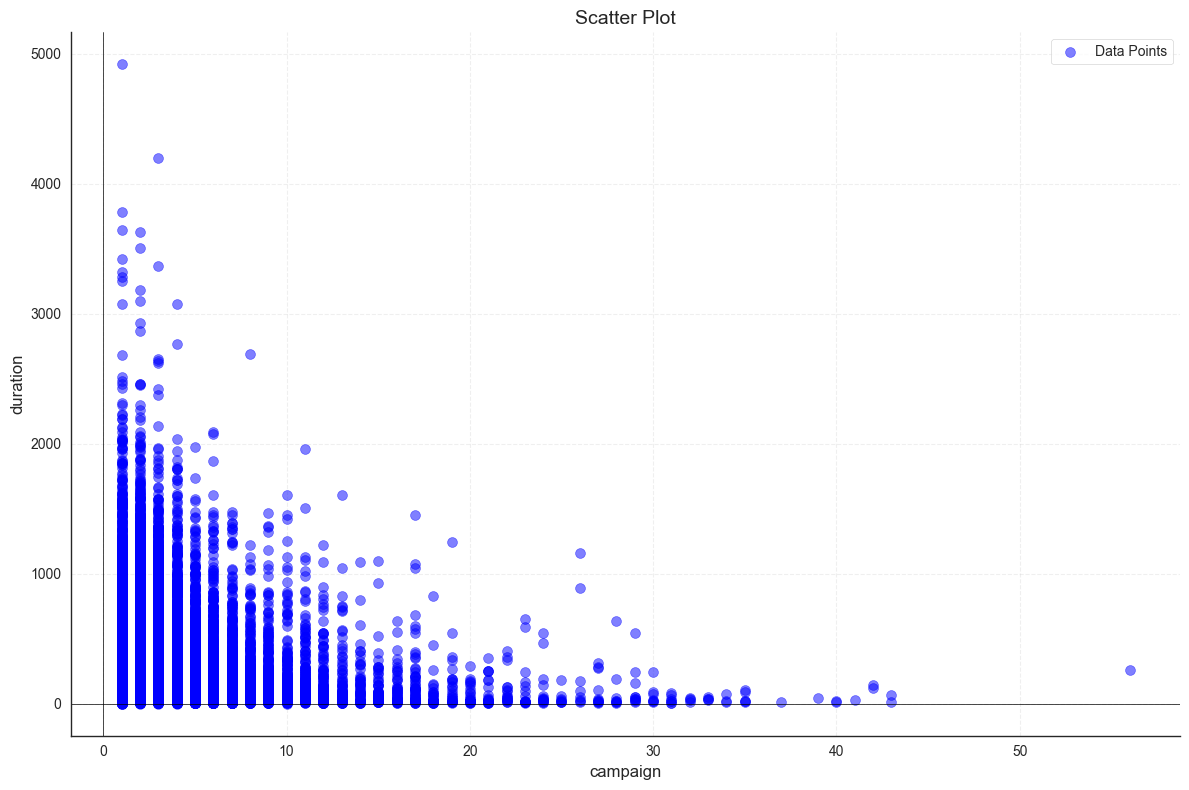

In [9]:

#Visualizing the duration of the campaign
x_column = 'campaign'
y_column = 'duration'

# Create a figure and axes
fig, ax = plt.subplots()

# Create a scatter plot with customizations
ax.scatter(dup_data[x_column], dup_data[y_column], color='blue', alpha=0.5, s=50)
ax.set_xlabel(x_column, fontsize=12)
ax.set_ylabel(y_column, fontsize=12)
ax.set_title('Scatter Plot', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()

# Add additional customizations
ax.legend(['Data Points'], loc='upper right', fontsize=10)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

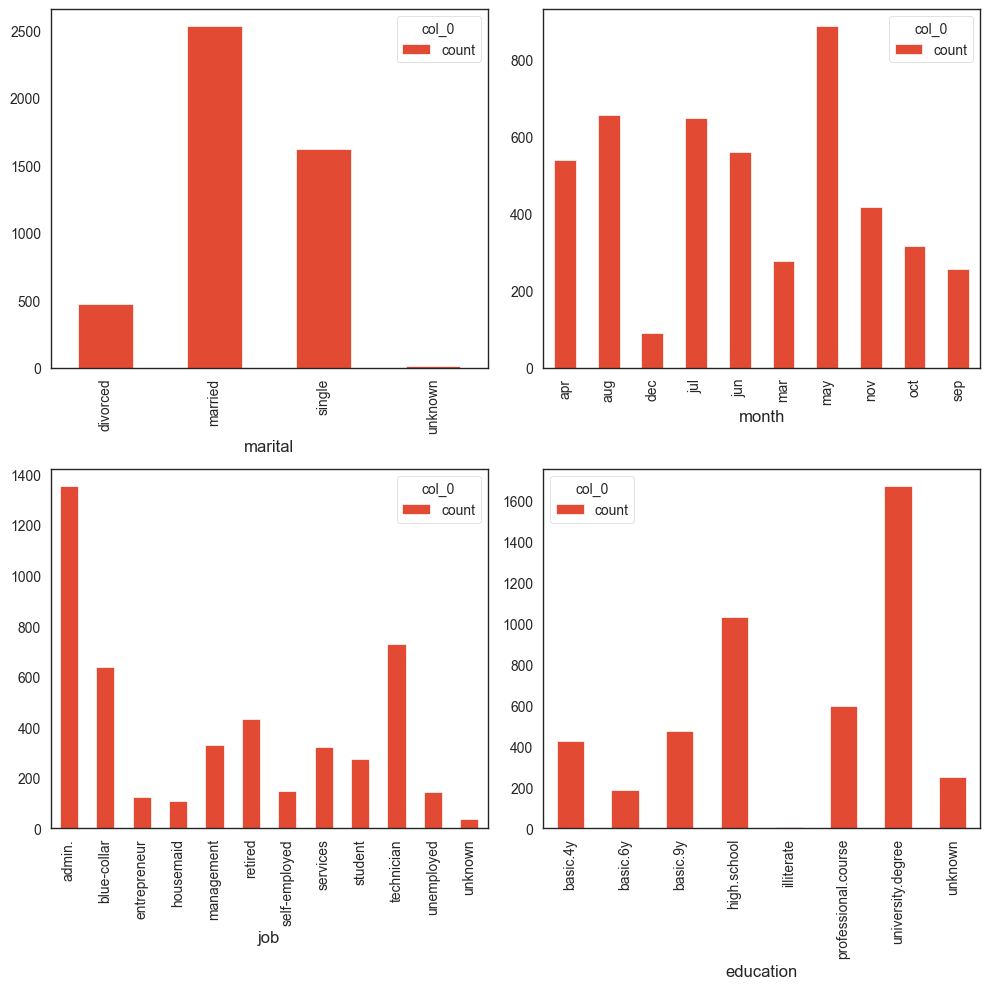

In [11]:

#Positive deposits vs attributes
bank_yes = dup_data[dup_data['y'] == 'yes']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

pd.crosstab(index=bank_yes['marital'], columns='count').plot.bar(ax=axes[0, 0])
pd.crosstab(index=bank_yes['month'], columns='count').plot.bar(ax=axes[0, 1])
pd.crosstab(index=bank_yes['job'], columns='count').plot.bar(ax=axes[1, 0])
pd.crosstab(index=bank_yes['education'], columns='count').plot.bar(ax=axes[1, 1])

plt.tight_layout()
plt.show()


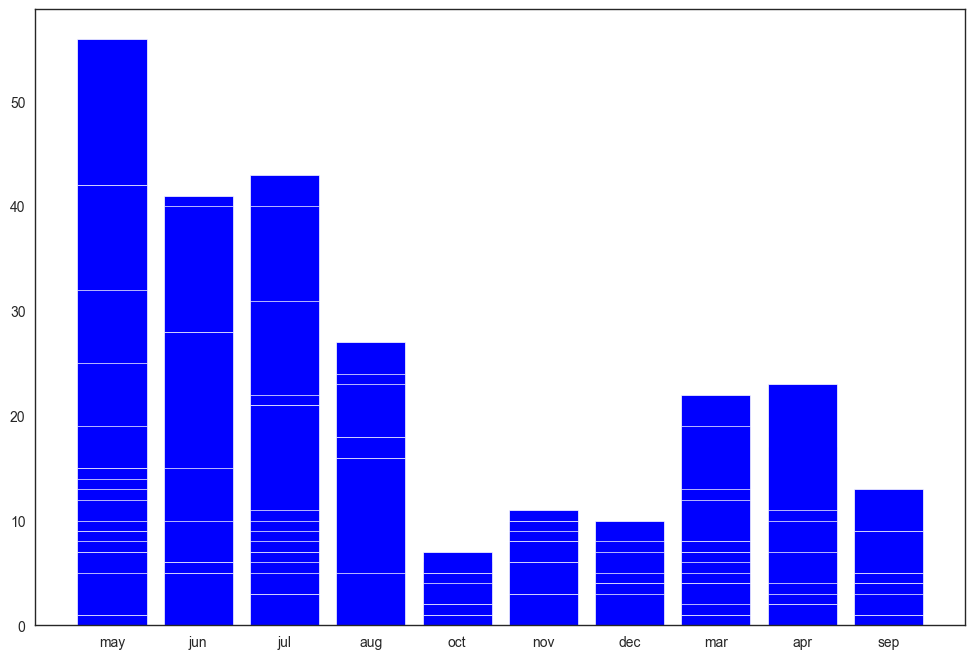

In [13]:
# Campaign vs Month
plt.bar(dup_data['month'],dup_data['campaign'], color='blue')


# Show the plot
plt.show()

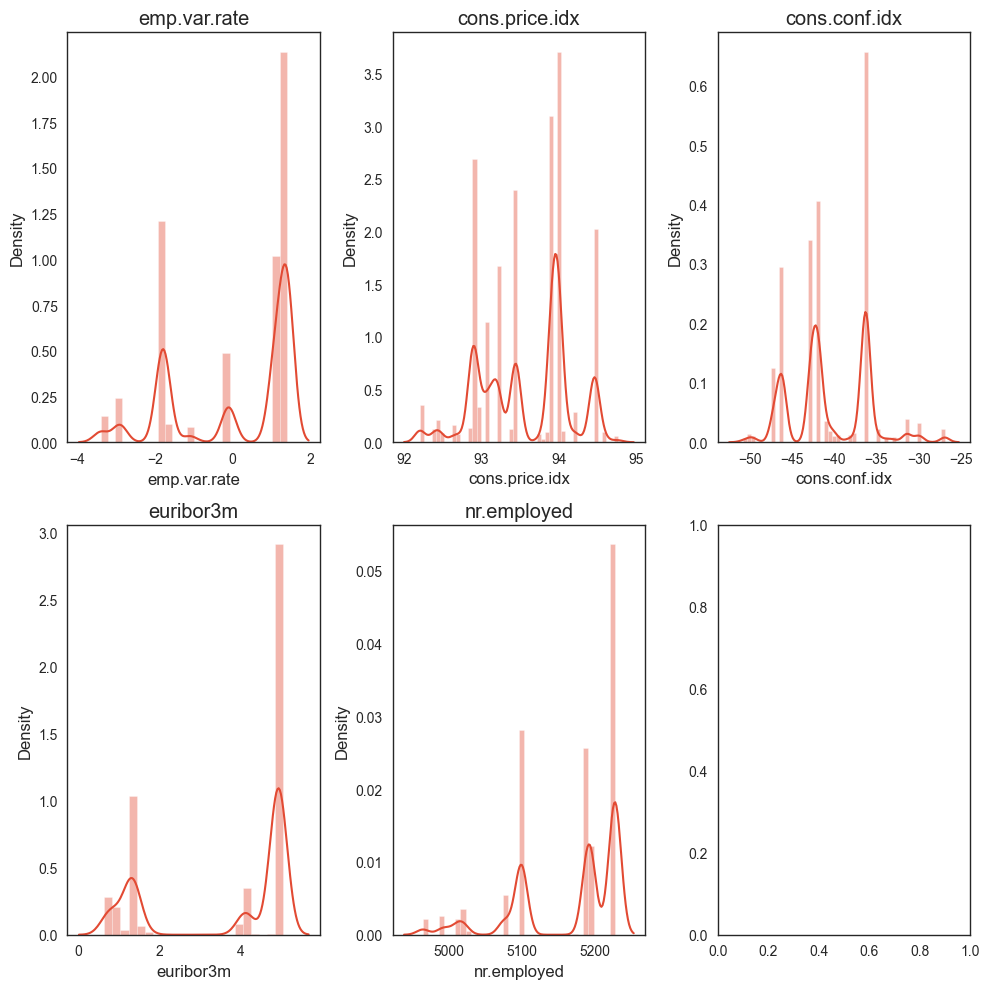

In [15]:
#Distribution of Quarterly Indicators

# Define the column names for the subplots
columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

# Iterate through the columns and plot the distributions
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.distplot(dup_data[column], ax=axs[row, col])
    axs[row, col].set_title(column)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

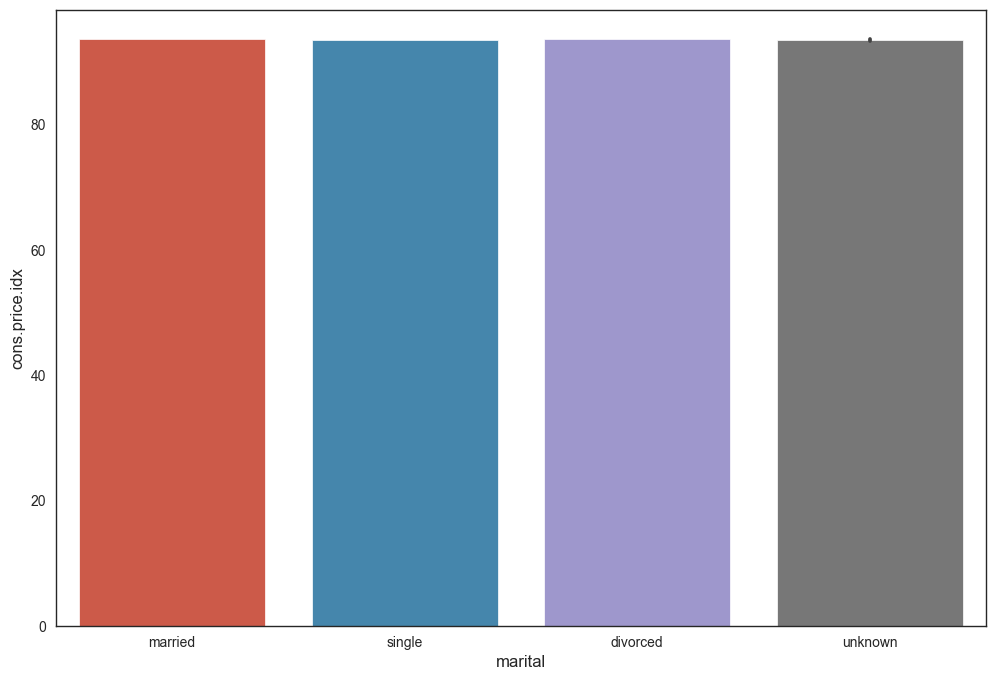

In [22]:
#Marital Status vs Price index
sns.barplot(x=dup_data["marital"], y=dup_data["cons.price.idx"])
plt.show()

<Axes: xlabel='education'>

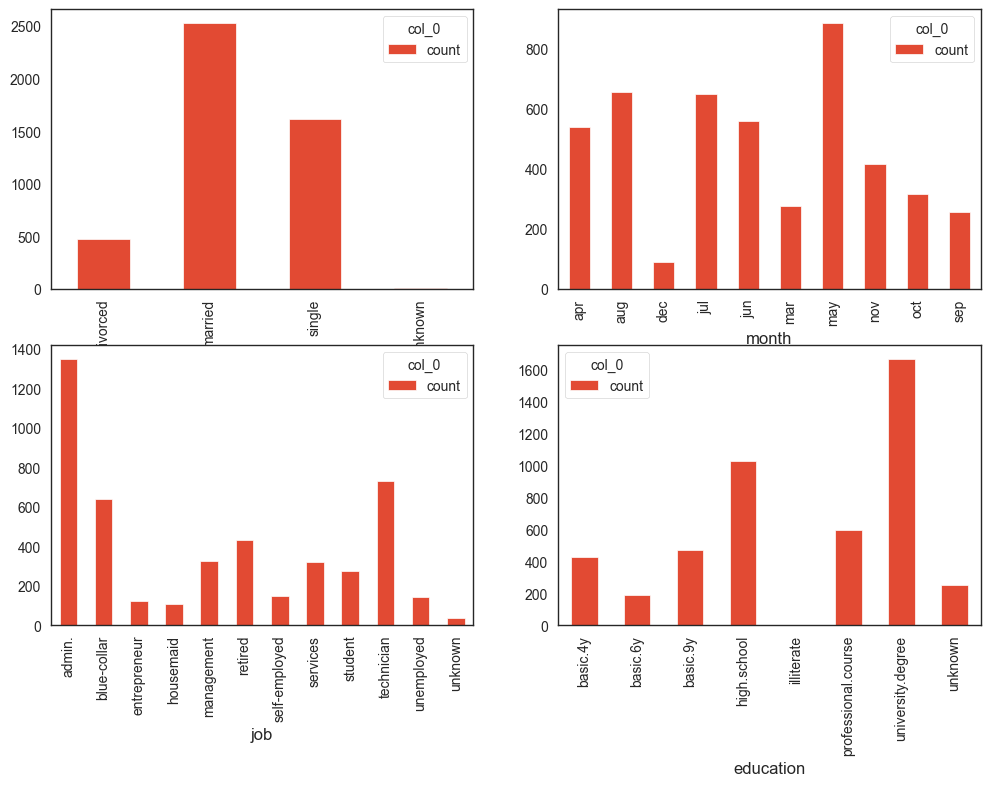

In [23]:

#Positive deposits vs attributes
bank_yes = dup_data[dup_data['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])       

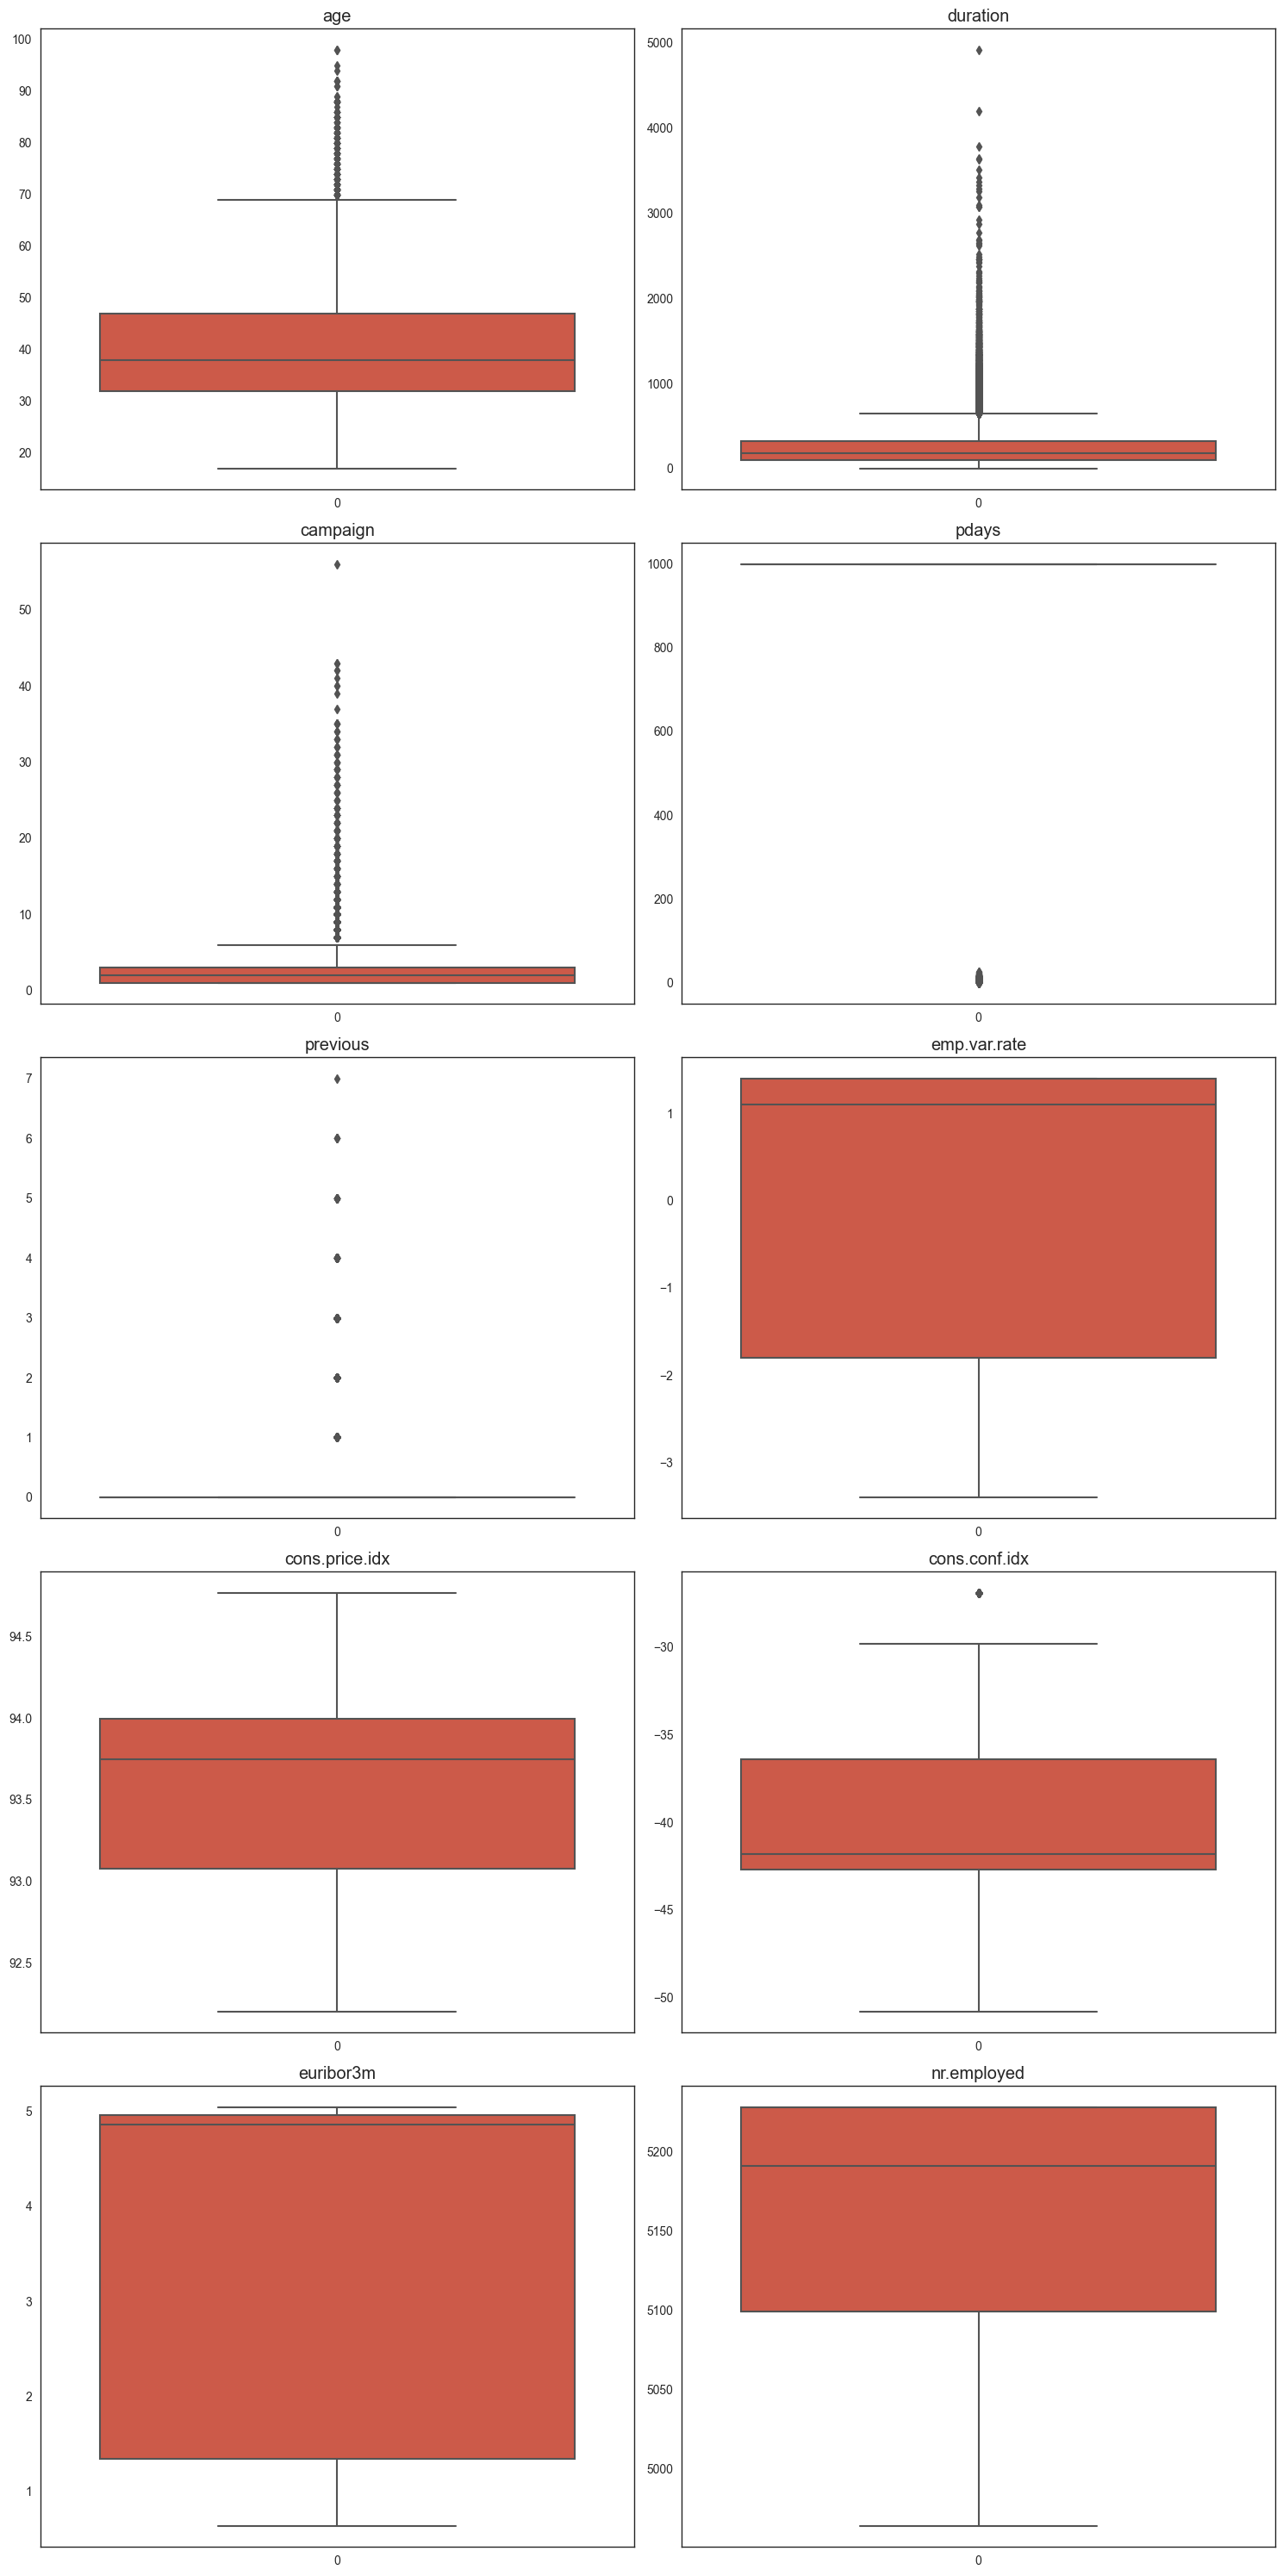

In [17]:
#Handling outliers

# Define the columns for the box plots
columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
           'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed']

# Create a figure with a specific size
fig, axs = plt.subplots(5, 2, figsize=(15, 30))

# Iterate through the columns and plot the box plots
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.boxplot(dup_data[column], ax=ax)
    ax.set_title(column)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


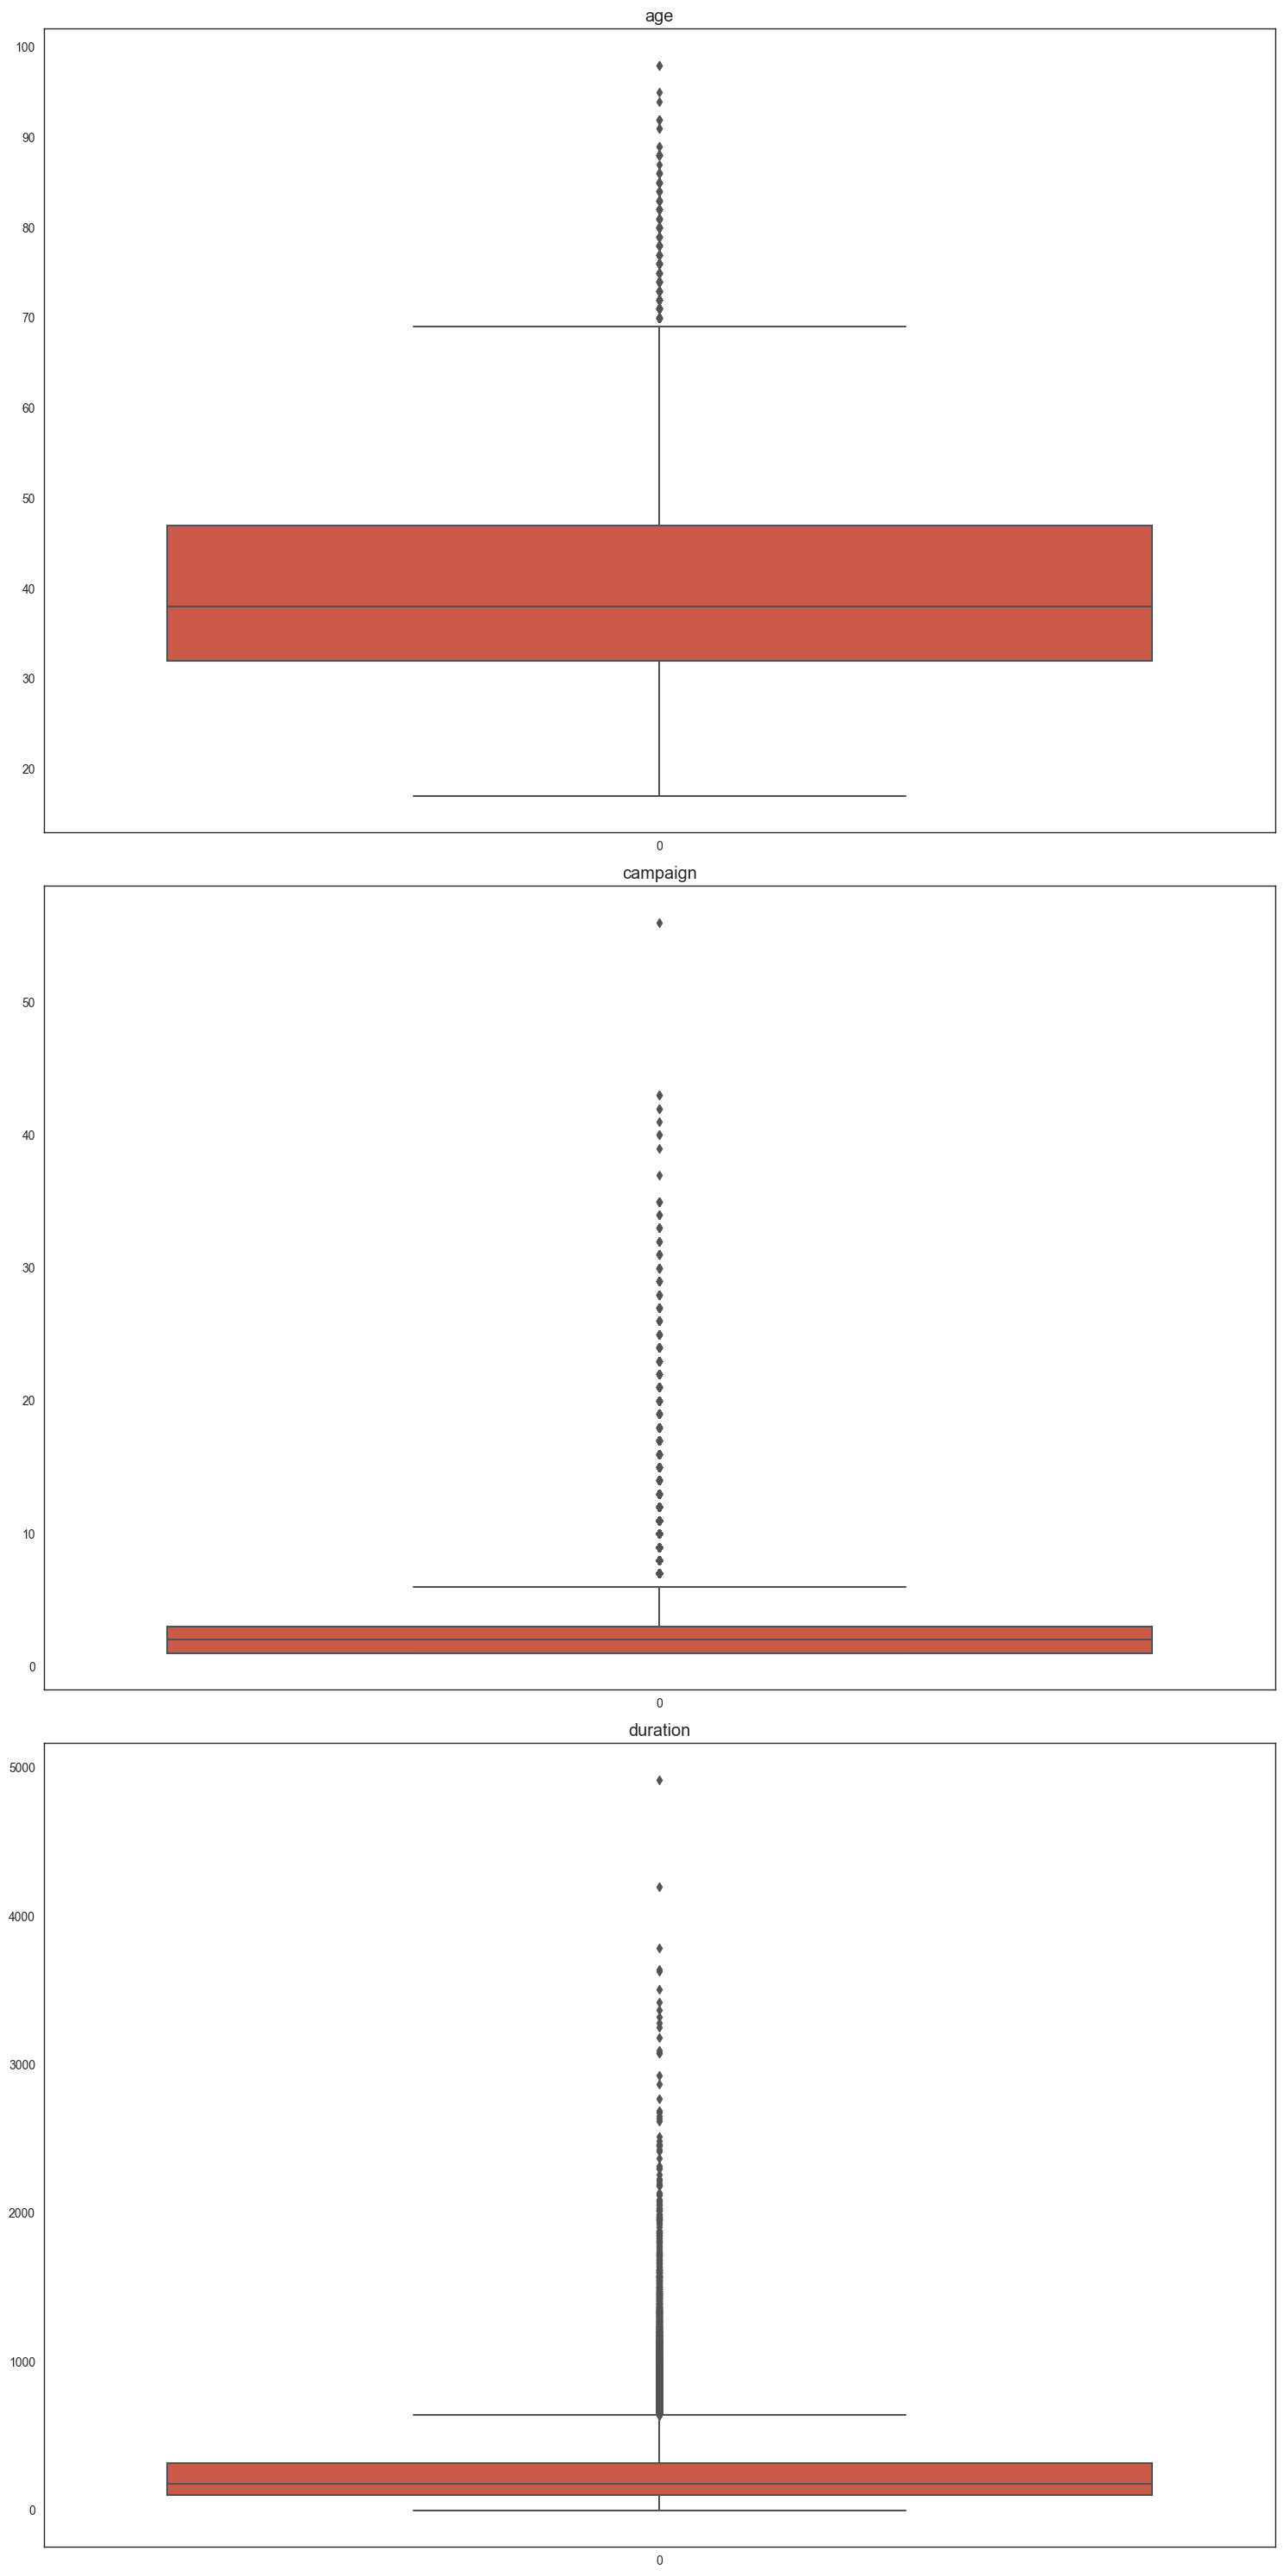

In [19]:
#Handling outliers

columns = ['age', 'campaign', 'duration']

fig, axs = plt.subplots(3, 1, figsize=(15, 30))

# Iterate through the columns and plot the box plots
for i, column in enumerate(columns):
    ax = axs[i]
    sns.boxplot(dup_data[column], ax=ax)

    # Set the title for each subplot
    ax.set_title(column)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

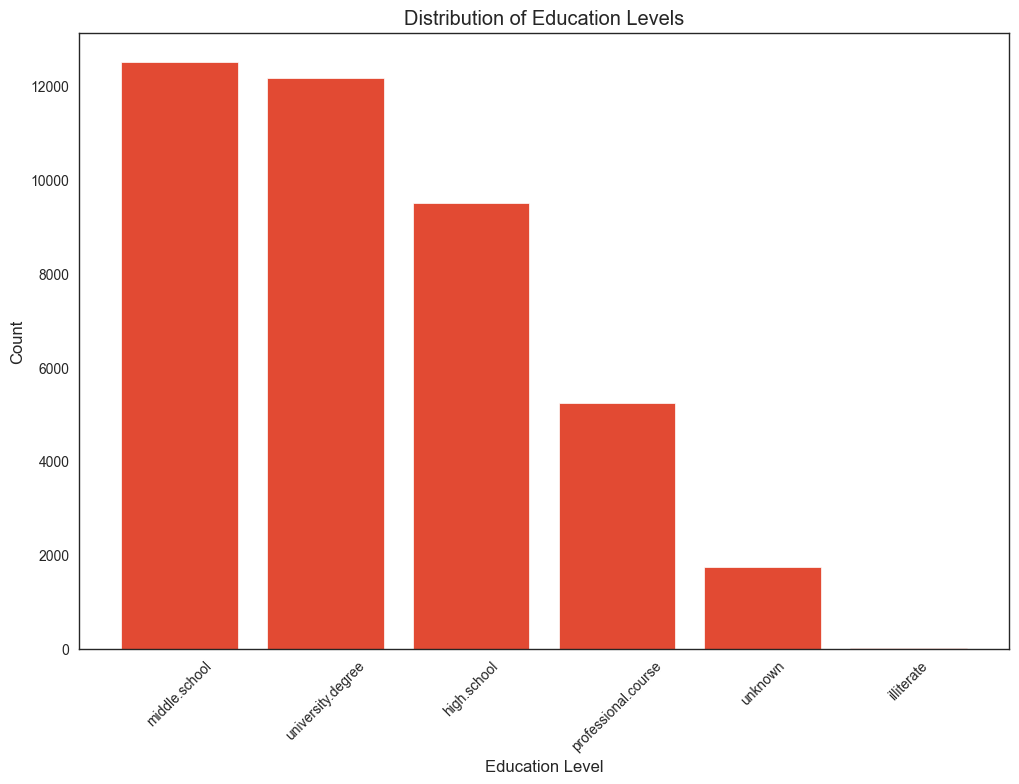

In [20]:
#Here we are clubbing categories in education 

# Create a copy of the dataset
bank_features = dup_data.copy()

# Define the list of education levels to be grouped
lst = ['basic.9y', 'basic.6y', 'basic.4y']

# Group the education levels into 'middle.school'
bank_features.loc[bank_features['education'].isin(lst), 'education'] = 'middle.school'

# Count the occurrences of each education level
education_counts = bank_features['education'].value_counts()

# Create a bar plot of the education levels
plt.bar(education_counts.index, education_counts.values)

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [24]:
#Encoding
bank_features = dup_data.copy()
# Define the dictionaries for mapping
month_dict = {'may': 5, 'jul': 7, 'aug': 8, 'jun': 6, 'nov': 11, 'apr': 4, 'oct': 10, 'sep': 9, 'mar': 3, 'dec': 12}
day_dict = {'thu': 5, 'mon': 2, 'wed': 4, 'tue': 3, 'fri': 6}

# Map the values using the dictionaries
bank_features['month'] = bank_features['month'].map(month_dict)
bank_features['day_of_week'] = bank_features['day_of_week'].map(day_dict)



In [25]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [26]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [27]:
bank_features['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [28]:
# Define the dictionary for mapping
dictionary = {'yes': 1, 'no': 0, 'unknown': -1}

# Map the values using the dictionary
bank_features['housing'] = bank_features['housing'].map(dictionary)
bank_features['default'] = bank_features['default'].map(dictionary)
bank_features['loan'] = bank_features['loan'].map(dictionary)
bank_features['y']=bank_features['y'].map(dictionary)
bank_features.groupby(['marital'])['y'].mean()


marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
Name: y, dtype: float64

In [29]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [30]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [31]:
bank_features.loc[:,['job','education']].head()

,job,education
0,1060,4176
1,3969,9515
2,3969,9515
3,10422,2292
4,3969,9515


In [32]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['married', 'divorced', 'single', 'unknown'], dtype='object', name='marital')

In [33]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'married': 0, 'divorced': 1, 'single': 2, 'unknown': 3}

In [34]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [35]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [36]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [37]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1060,4176,0,0,0,5,2,0,1,1,0,0,1.533034,-0.787808,0.010471,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,3969,9515,-1,0,0,5,2,0,1,1,0,0,1.628993,-0.787808,-0.421501,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,3969,9515,0,1,0,5,2,0,1,1,0,0,-0.290186,-0.787808,-0.124520,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,10422,2292,0,0,0,5,2,0,1,1,0,0,-0.002309,-0.787808,-0.413787,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,3969,9515,0,0,1,5,2,0,1,1,0,0,1.533034,-0.787808,0.187888,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [43]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

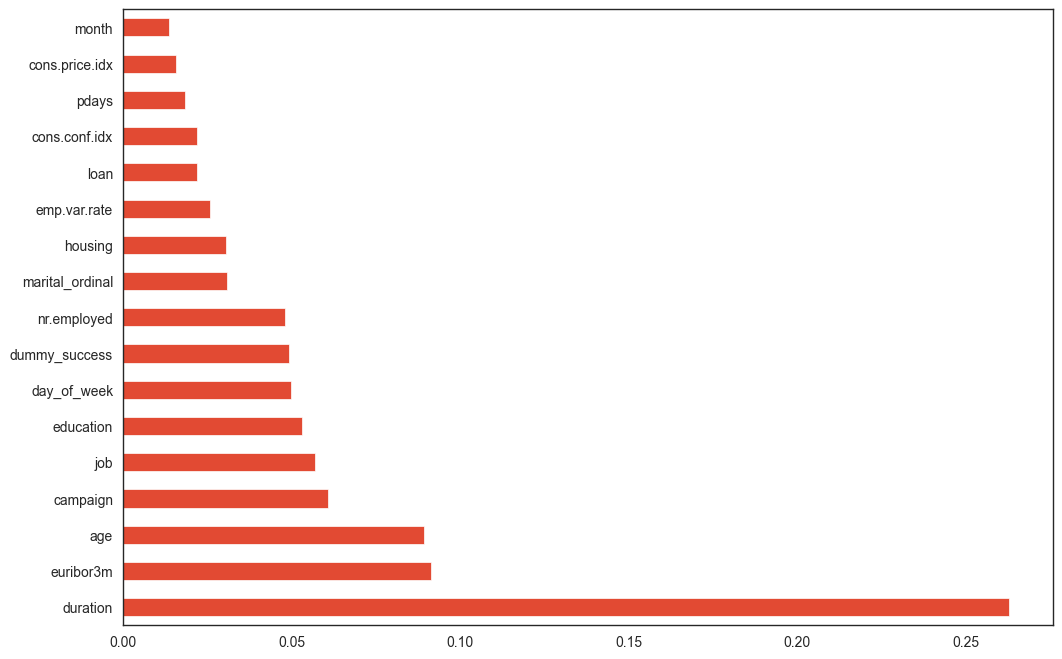

In [44]:
#From the bar plot we can see the importances of features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [45]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (32950, 15)
Input Test: (8238, 15)
Output Training: (32950,)
Output Test: (8238,)


In [50]:
#Testing the models
logreg_cv = LogisticRegression(random_state=0)
logreg_cv.fit(X_train,y_train)
logreg_cv_pred=logreg_cv.predict(X_test)
###############################
dt_cv=DecisionTreeClassifier()
dt_cv.fit(X_train,y_train)
dt_cv_pred=dt_cv.predict(X_test)
##############################
knn_cv=KNeighborsClassifier()
knn_cv.fit(X_train,y_train)
knn_cv_pred=dt_cv.predict(X_test)
##############################
svc_cv=SVC()
svc_cv.fit(X_train,y_train)
svc_cv_pred=dt_cv.predict(X_test)
##############################
nb_cv=BernoulliNB()
nb_cv.fit(X_train,y_train)
nb_cv_pred=dt_cv.predict(X_test)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))
    print("Classification Report:\n",classification_report(y_test,logreg_cv_pred))

Logistic Regression Test Accuracy: 0.8618689365348817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7294
           1       0.60      0.38      0.46       944

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238

Decision Tree Test Accuracy: 0.6535521784464394
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7294
           1       0.60      0.38      0.46       944

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238

KNN Test Accuracy: 0.835623370110745
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7294
           1       0.60   